In [11]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition #검출기 + 인식기
import os
from imutils import paths

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 10 face(s) in this photograph.


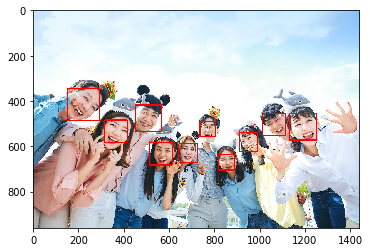

In [17]:
img = cv2.imread("pic/group2.jpg")
#face_locations = face_recognition.face_locations(img) #HOG를 기반으로 하기때문에 속도가 느리지는 않다.
face_locations = face_recognition.face_locations(img, model="cnn") # CNN 기반은 속도가 느리다,, strong classifier
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [7]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("cfg_file/face_recognition/shape_predictor_68_face_landmarks.dat") #하라이크처럼 고속으로 처리되는 알고리즘 사용
detector = dlib.get_frontal_face_detector()

In [72]:
frame = cv2.imread("pic/son2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    

Number of faces detected: 1
[(342, 169) (446, 273)]


In [74]:
for k, d in enumerate(rects): #enumerate 를 통해 인덱스와 내용을 같이 줄 수 있음
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d) # 이미지, 좌표
        shape = face_utils.shape_to_np(shape)
#         for (x, y) in shape:
#             cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Detection 0: Left: 342 Top: 169 Right: 446 Bottom: 273


In [75]:
print(rects[0]) #[(821, 637) (893, 709)] , 첫번째 얼굴에 대한 왼쪽좌표, 오른쪽 좌표
shape_1 =  predictor(gray, rects[0]) 
print(shape_1) #<dlib.dlib.full_object_detection object at 0x0000021FE1762C00>
shape_1 = face_utils.shape_to_np(shape_1)#numpy 객체로 뽑아줌
#print(shape_1) #얼굴의 점들이 넘파이형태로 저장


[(342, 169) (446, 273)]


<img src="pic/facial_landmarks_68markup.jpg" alt="facial_landmarks_68markup" style="zoom:30%;" />

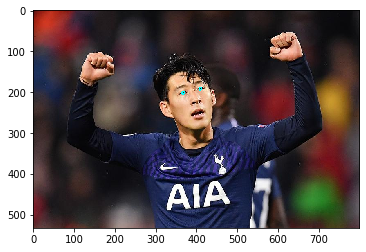

In [76]:
eye_l = np.mean(shape_1[36:42], axis=0)
eye_r = np.mean(shape_1[42:48], axis=0)
cv2.circle(frame, (int(eye_l[0]) ,int(eye_l[1])) , 3, (255, 255, 0), 2)
cv2.circle(frame, (int(eye_r[0]) ,int(eye_r[1])) , 3, (255, 255, 0), 2)
imshow('',frame)

In [77]:
cv2.imwrite("out.jpg", frame)

True